In [1]:
import sys
sys.path.append( '..' )
from utilities.get_data import get_historical_from_db
import pandas as pd
import ccxt
import matplotlib.pyplot as plt
import ta
import requests
import seaborn as sns
import datetime

/usr/local/lib/python3.9/dist-packages/pandas/core/arrays/masked.py:59: UserWarning: Pandas requires version '1.3.2' or newer of 'bottleneck' (version '1.2.1' currently installed).
  from pandas.core import (


In [2]:
pair = "BTC/USDT"
tf = "1d"

df = get_historical_from_db(ccxt.binance(),pair,tf,path="../database/")

response = requests.get("https://api.alternative.me/fng/?limit=0&format=json")
dataResponse = response.json()['data']
fear = pd.DataFrame(dataResponse, columns = ['timestamp', 'value'])

fear = fear.set_index(fear['timestamp'])
fear.index = pd.to_datetime(fear.index, unit='s')
del fear['timestamp']

df['fearResult'] = fear['value']
df['FEAR'] = df['fearResult'].ffill()
df['FEAR'] = df.FEAR.astype(float)
df['ema_fear'] = ta.trend.sma_indicator(close=df['FEAR'], window=5)
df['ema_fear_late'] = df['ema_fear'].shift(5)
df['signal'] = ta.trend.sma_indicator(close=df['ema_fear'], window=15)
df["pct_change"] = df["close"].pct_change()
df["high_low_diff"] = (df["high"] - df["low"]) / df["low"]
df["n7_diff"] = (df["close"].shift(-7) - df["close"]) / df["close"]
df["n14_diff"] = (df["close"].shift(-14) - df["close"]) / df["close"]
df["n30_diff"] = (df["close"].shift(-30) - df["close"]) / df["close"]
df["n90_diff"] = (df["close"].shift(-90) - df["close"]) / df["close"]
df["fear_category"] = 0
df.loc[(df["FEAR"] < 20) & (df["fear_category"] == 0), "fear_category"] = 1
df.loc[(df["FEAR"] < 40) & (df["fear_category"] == 0), "fear_category"] = 2
df.loc[(df["FEAR"] < 60) & (df["fear_category"] == 0), "fear_category"] = 3
df.loc[(df["FEAR"] < 80) & (df["fear_category"] == 0), "fear_category"] = 4
df.loc[(df["FEAR"] < 100) & (df["fear_category"] == 0), "fear_category"] = 5

df = df.loc["2022-10-01":]

In [3]:
df

,open,high,low,close,volume,fearResult,FEAR,ema_fear,ema_fear_late,signal,pct_change,high_low_diff,n7_diff,n14_diff,n30_diff,n90_diff,fear_category
date,,,,,,,,,,,,,,,,,
2022-10-10 00:00:00,19439.96,19440.59,19430.00,19434.28,128.31192,22,22.0,22.0,22.0,22.0,-0.000244,0.000545,-0.000867,-0.000436,-0.000885,0.003140,2
2022-10-10 00:01:00,19433.89,19434.28,19420.52,19425.03,152.02549,NaN,22.0,22.0,22.0,22.0,-0.000476,0.000709,-0.000429,0.000555,-0.000848,0.003609,2
2022-10-10 00:02:00,19425.03,19437.88,19424.57,19432.36,114.34187,NaN,22.0,22.0,22.0,22.0,0.000377,0.000685,-0.000904,0.000283,-0.000803,0.002884,2
2022-10-10 00:03:00,19433.38,19434.22,19410.00,19416.71,154.02925,NaN,22.0,22.0,22.0,22.0,-0.000805,0.001248,0.000399,0.001077,-0.000364,0.003886,2
2022-10-10 00:04:00,19416.92,19430.14,19415.79,19421.00,109.90147,NaN,22.0,22.0,22.0,22.0,0.000221,0.000739,-0.000119,0.000979,-0.000331,0.004089,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-20 06:20:00,16678.63,16683.85,16678.38,16682.38,32.68338,NaN,24.0,24.0,24.0,24.0,0.000209,0.000328,NaN,NaN,NaN,NaN,2
2022-11-20 06:21:00,16682.38,16683.28,16680.04,16681.62,25.90881,NaN,24.0,24.0,24.0,24.0,-0.000046,0.000194,NaN,NaN,NaN,NaN,2
2022-11-20 06:22:00,16681.62,16682.33,16678.04,16678.44,32.80870,NaN,24.0,24.0,24.0,24.0,-0.000191,0.000257,NaN,NaN,NaN,NaN,2


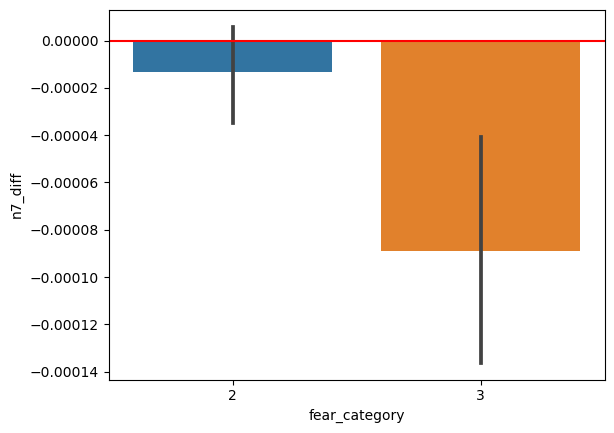

In [4]:
ax = sns.barplot(x="fear_category", y="n7_diff", data=df)
ax.axhline(0, c="red")

In [5]:
print((df.loc[df["pct_change"] > 0]["FEAR"]).mean())
print((df.loc[df["pct_change"] < 0]["FEAR"]).mean())
print((df.loc[df["pct_change"] > 0.05]["FEAR"]).mean())
print((df.loc[df["pct_change"] < -0.05]["FEAR"]).mean())

25.904884755083337
25.973175212961415
nan
nan


In [6]:
print((df.loc[df["FEAR"] > 50]["pct_change"]).mean())
print((df.loc[df["FEAR"] < 50]["pct_change"]).mean())
print((df.loc[df["FEAR"] > 80]["pct_change"]).mean())
print((df.loc[df["FEAR"] < 20]["pct_change"]).mean())

nan
-2.1673099983742277e-06
nan
nan


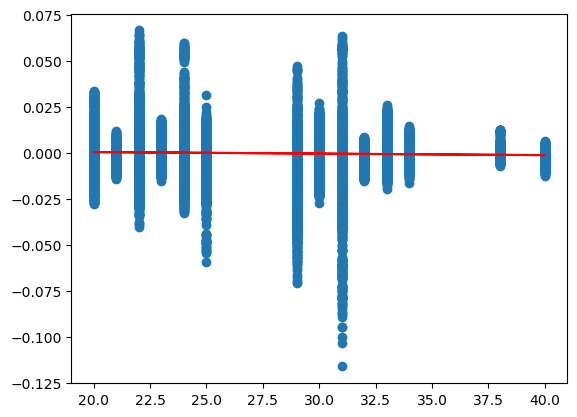

In [7]:
from scipy import stats 
x_col = "n90_diff"
y_col = "FEAR"
x = df.loc[(df[x_col].notna())][y_col]
y = df.loc[(df[x_col].notna())][x_col]
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

def predict(x):
   return slope * x + intercept

fitLine = predict(x)

plt.scatter(x, y)
plt.plot(x, fitLine, c='r')
plt.show()

<AxesSubplot:xlabel='date'>

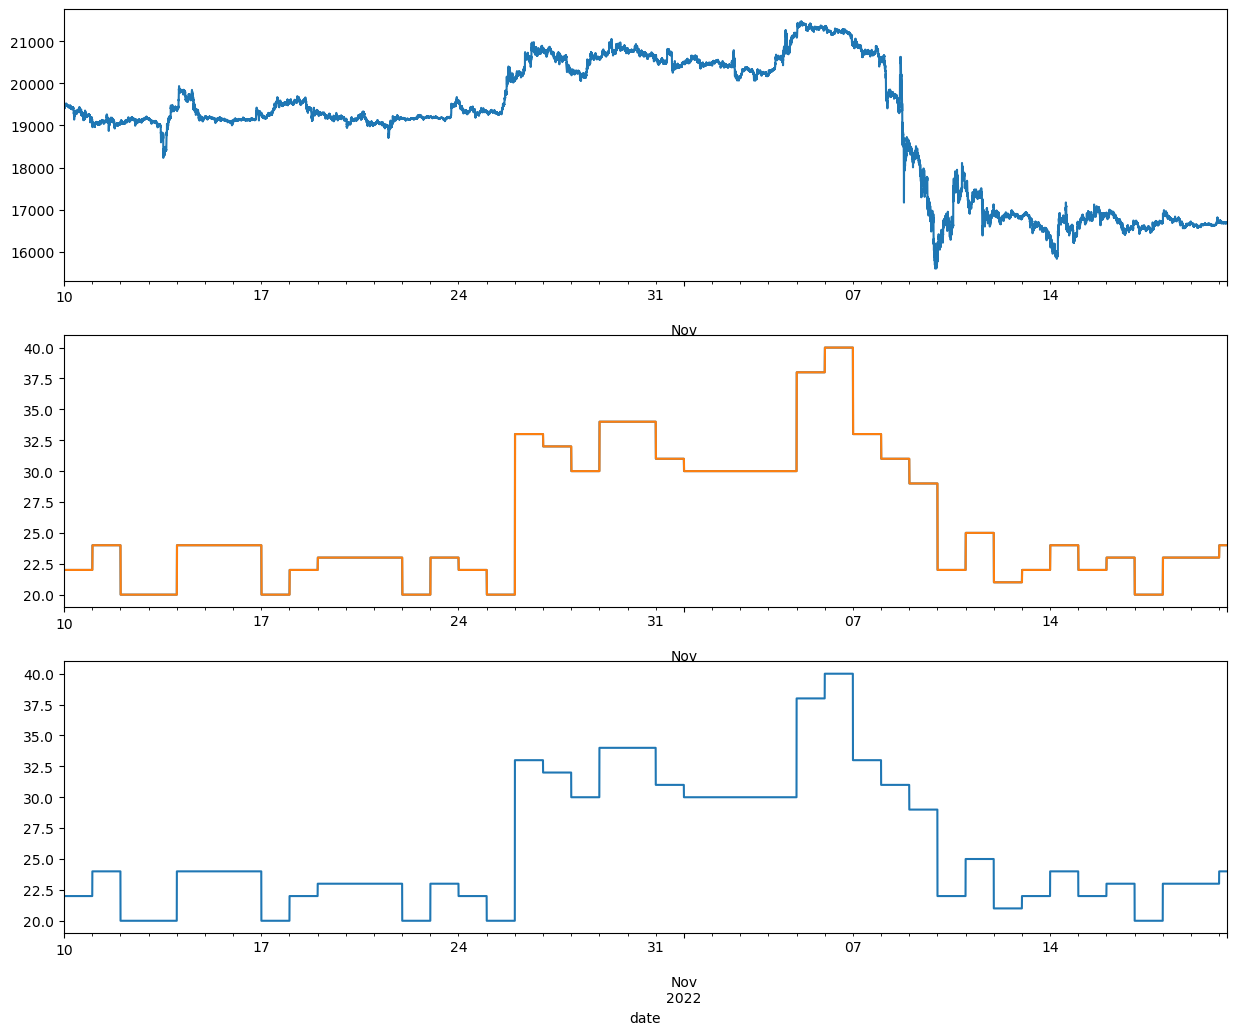

In [8]:
fig, axes = plt.subplots(figsize=(15, 12), nrows=3, ncols=1)
df['close'].plot(ax=axes[0])
df['ema_fear'].plot(ax=axes[1])
# df['signal'].plot(ax=axes[1])
df['ema_fear_late'].plot(ax=axes[1])
df['FEAR'].plot(ax=axes[2])

In [9]:
# Buy FEAR > 60 and Sell FEAR < 40
# Cross ema 7, late 7

In [10]:
initial_wallet = 1000 # Somme d'usd au début de la stratégie
taker_fee = 0.0007 # ~ 0.07% de frais sur binance et ftx 

# Condition pour rentrer en achat (row = période actuelle et previous_row = période précédente)
def buy_condition(row, previous_row = None):
    if row['FEAR'] > 60:
        return True
    else:
        return False

# Condition pour vendre (row = période actuelle et previous_row = période précédente)
def sell_condition(row, previous_row = None):
    if row['FEAR'] < 40:
        return True
    else:
        return False

# Initalisation de notre portefeuille
wallet = initial_wallet
usd = initial_wallet
coin = 0

# Initialisation de nos tableaux qui vont contenir nos données d'analyse
trades_hitory = []
days_history = []
previous_day = 0

# Simulation de notre stratégie en parcourant notre tableau ligne par ligne
for index, row in df.iterrows():

    # Garde en mémoire l'évolution de notre portefeuille chaque jour pour pouvoir analyser plus tard
    current_day = index.day
    if previous_day != current_day:
        temp_wallet = wallet
        if coin > 0:
            temp_wallet = coin*row['close']
        days_history.append({
            "day":str(index.year)+"-"+str(index.month)+"-"+str(index.day),
            "wallet":temp_wallet,
            "price":row['close']
        })
    previous_day = current_day

    # Vérifie les conditions si l'on doit acheter
    if buy_condition(row) and usd > 0:
        # Condition vérifiée, on achète à la clotûre
        coin = usd / row['close']           
        fee = taker_fee * coin             
        coin = coin - fee                   
        usd = 0                            
        wallet = coin * row['close']       
        # Ajout de données pour analyse future
        buy_data = {
            'date': index,
            'position': 'buy',
            'price': row['close'],
            'fee': fee * row['close'],
            'usd': usd,
            'coin': coin,
            'wallet': wallet
        }
        trades_hitory.append(buy_data) 

    # Vérifie les conditions si l'on doit vendre
    elif sell_condition(row) and  coin > 0:
        # Condition vérifiée, on vend à la clotûre
        usd = coin * row['close']          
        fee = taker_fee * usd               
        usd = usd - fee                     
        coin = 0                           
        wallet = usd                      
        # Ajout de données pour analyse future
        buy_data = {
            'date': index,
            'position': 'sell',
            'price': row['close'],
            'fee': fee,
            'usd': usd,
            'coin': coin,
            'wallet': wallet           
        }
        trades_hitory.append(buy_data) 

# Convertit en tableau exploitable les données récupérer lors de la simulation
df_days = pd.DataFrame(days_history)
df_days['day'] = pd.to_datetime(df_days['day'])
df_days = df_days.set_index(df_days['day'])

df_trades = pd.DataFrame(trades_hitory)
df_trades['date'] = pd.to_datetime(df_trades['date'])
df_trades = df_trades.set_index(df_trades['date'])

print("Backtest finished, ready for analysis...")

KeyError: 'date'

Period: [2021-01-01 00:00:00] -> [2022-11-20 00:00:00]
Initial wallet: 1000.0 $

--- General Information ---
Final wallet: 1585.37 $
Performance vs US dollar: 58.54 %
Worst Drawdown : -33.72%
Buy and hold performance: -43.12 %
Performance vs buy and hold: 178.73 %
Total trades on the period: 5
Global Win rate: 80.0 %
Average Profit: 12.84 %
Total fee: 10.83 $

Best trades: +68.94 % the 2021-03-01 00:00:00
Worst trades: -14.12 % the 2021-05-13 00:00:00

--- Plot wallet evolution vs asset ---


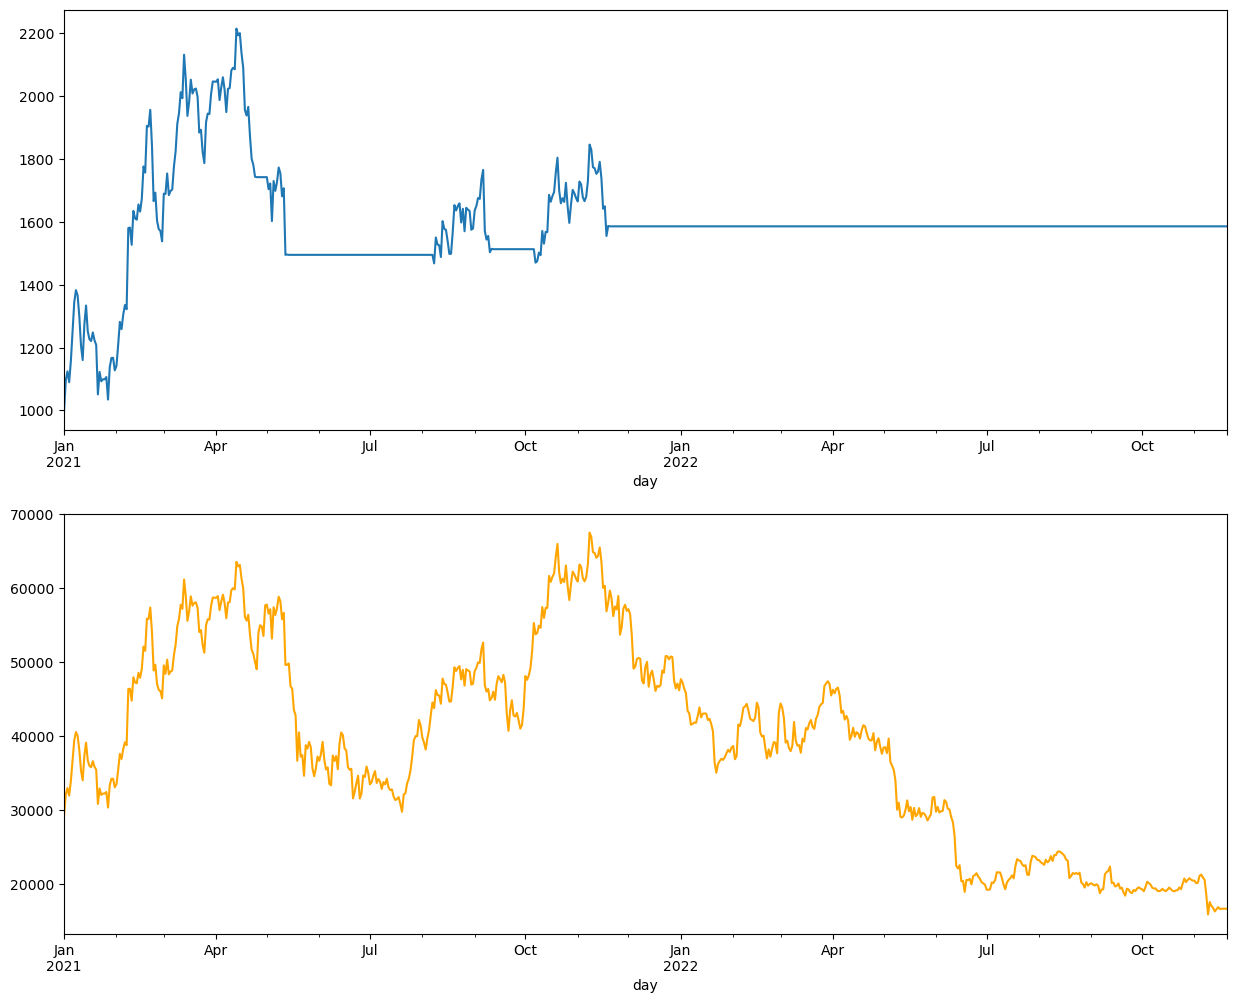

In [ ]:
def plot_bar_by_month(df_days):
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    custom_palette = {}
    
    last_month = int(df_days.iloc[-1]['day'].month)
    last_year = int(df_days.iloc[-1]['day'].year)
    
    current_month = int(df_days.iloc[0]['day'].month)
    current_year = int(df_days.iloc[0]['day'].year)
    current_year_array = []
    while current_year != last_year or current_month-1 != last_month:
        date_string = str(current_year) + "-" + str(current_month)
        
        monthly_perf = (df_days.loc[date_string]['wallet'].iloc[-1] - df_days.loc[date_string]['wallet'].iloc[0]) / df_days.loc[date_string]['wallet'].iloc[0]
        monthly_row = {
            'date': str(datetime.date(1900, current_month, 1).strftime('%B')),
            'result': round(monthly_perf*100)
        }
        if monthly_row["result"] >= 0:
            custom_palette[str(datetime.date(1900, current_month, 1).strftime('%B'))] = 'g'
        else:
            custom_palette[str(datetime.date(1900, current_month, 1).strftime('%B'))] = 'r'
        current_year_array.append(monthly_row)
        # print(monthly_perf*100) 
        if ((current_month == 12) or (current_month == last_month and current_year == last_year)):
            current_df = pd.DataFrame(current_year_array)
            # print(current_df)
            g = sns.barplot(data=current_df,x='date',y='result', palette=custom_palette)
            for index, row in current_df.iterrows():
                if row.result >= 0:
                    g.text(row.name,row.result, '+'+str(round(row.result))+'%', color='black', ha="center", va="bottom")
                else:
                    g.text(row.name,row.result, '-'+str(round(row.result))+'%', color='black', ha="center", va="top")
            g.set_title(str(current_year) + ' performance in %')
            g.set(xlabel=current_year, ylabel='performance %')
            
            year_result = (df_days.loc[str(current_year)]['wallet'].iloc[-1] - df_days.loc[str(current_year)]['wallet'].iloc[0]) / df_days.loc[str(current_year)]['wallet'].iloc[0]
            print("----- " + str(current_year) +" Cumulative Performances: " + str(round(year_result*100,2)) + "% -----")
            plt.show()

            current_year_array = []
        
        current_month += 1
        if current_month > 12:
            current_month = 1
            current_year += 1

def plot_wallet_vs_asset(df_days):
    fig, axes = plt.subplots(figsize=(15, 12), nrows=2, ncols=1)
    df_days['wallet'].plot(ax=axes[0])
    df_days['price'].plot(ax=axes[1], color='orange')

def show_analys(days, trades):
    df_trades = trades.copy()
    df_days = days.copy()

    df_days['evolution'] = df_days['wallet'].diff()
    df_trades['trade_result'] = df_trades['wallet'].diff()
    df_trades['trade_result_pct'] = df_trades['wallet'].pct_change()

    df_days['wallet_ath'] = df_days['wallet'].cummax()
    df_days['drawdown'] = df_days['wallet_ath'] - df_days['wallet']
    df_days['drawdown_pct'] = df_days['drawdown'] / df_days['wallet_ath']

    initial_wallet = df_days.iloc[0]["wallet"]

    close_trades = df_trades.loc[df_trades['position'] == 'sell']
    good_trades = close_trades.loc[close_trades['trade_result_pct'] > 0]
    total_trades = len(close_trades)
    total_good_trades = len(good_trades)
    avg_profit = close_trades['trade_result_pct'].mean() 
    global_win_rate = total_good_trades / total_trades
    max_days_drawdown = df_days['drawdown_pct'].max()
    final_wallet = df_days.iloc[-1]['wallet']
    buy_and_hold_pct = (df_days.iloc[-1]['price'] - df_days.iloc[0]['price']) / df_days.iloc[0]['price']
    buy_and_hold_wallet = initial_wallet + initial_wallet * buy_and_hold_pct
    vs_hold_pct = (final_wallet - buy_and_hold_wallet)/buy_and_hold_wallet
    vs_usd_pct = (final_wallet - initial_wallet)/initial_wallet
    total_fee = df_trades['fee'].sum()

    best_trade = df_trades['trade_result_pct'].max()
    best_trade_date =  str(df_trades.loc[df_trades['trade_result_pct'] == best_trade].iloc[0]['date'])
    worst_trade = df_trades['trade_result_pct'].min()
    worst_trade_date =  str(df_trades.loc[df_trades['trade_result_pct'] == worst_trade].iloc[0]['date'])

    print("Period: [{}] -> [{}]".format(df_days.iloc[0]["day"], df_days.iloc[-1]["day"]))
    print("Initial wallet: {} $".format(round(initial_wallet,2)))

    print("\n--- General Information ---")
    print("Final wallet: {} $".format(round(final_wallet,2)))
    print("Performance vs US dollar: {} %".format(round(vs_usd_pct*100,2)))
    print("Worst Drawdown : -{}%".format(round(max_days_drawdown*100, 2)))
    print("Buy and hold performance: {} %".format(round(buy_and_hold_pct*100,2)))
    print("Performance vs buy and hold: {} %".format(round(vs_hold_pct*100,2)))
    print("Total trades on the period: {}".format(total_trades))
    print("Global Win rate: {} %".format(round(global_win_rate*100, 2)))
    print("Average Profit: {} %".format(round(avg_profit*100, 2)))
    print("Total fee: {} $".format(round(total_fee, 2)))

    print("\nBest trades: +{} % the {}".format(round(best_trade*100, 2), best_trade_date))
    print("Worst trades: {} % the {}".format(round(worst_trade*100, 2), worst_trade_date))

# Fonction pour afficher une analyse complète de la stratégie sur le passé
show_analys(df_days.loc[:], df_trades.loc[:])

print("\n--- Plot wallet evolution vs asset ---")
# Fonction pour afficher une analyse complète de la stratégie sur le passé
plot_wallet_vs_asset(df_days.loc[:])